In [1]:
# Imports
from PIL import Image, ImageFilter
import numpy as np
from transformers import pipeline

c:\Users\koushik\miniconda3\envs\hugging_face\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Image segmentation model from hugging face hub

model = pipeline("image-segmentation", model="facebook/detr-resnet-50-panoptic")

#[{'label': 'cat',
#  'mask': mask_code,
#  'score': 0.999}
# ...]

In [4]:
image = Image.open("test_images/test-3.jpg", mode='r')
pred = model(image)

In [17]:
image.size[0]

1536

In [5]:
pred

[{'score': 0.959346354007721,
  'label': 'wine glass',
  'mask': <PIL.Image.Image image mode=L size=1536x862 at 0x7F8DEE20BF10>},
 {'score': 0.9997873902320862,
  'label': 'person',
  'mask': <PIL.Image.Image image mode=L size=1536x862 at 0x7F8DEE20BD50>},
 {'score': 0.994025707244873,
  'label': 'bottle',
  'mask': <PIL.Image.Image image mode=L size=1536x862 at 0x7F8DEE20B950>},
 {'score': 0.9518199563026428,
  'label': 'handbag',
  'mask': <PIL.Image.Image image mode=L size=1536x862 at 0x7F8DEE223110>},
 {'score': 0.9615270495414734,
  'label': 'LABEL_199',
  'mask': <PIL.Image.Image image mode=L size=1536x862 at 0x7F8DEE223150>},
 {'score': 0.9976905584335327,
  'label': 'cell phone',
  'mask': <PIL.Image.Image image mode=L size=1536x862 at 0x7F8DEE2231D0>},
 {'score': 0.9992620348930359,
  'label': 'person',
  'mask': <PIL.Image.Image image mode=L size=1536x862 at 0x7F8DEE223190>},
 {'score': 0.9997851252555847,
  'label': 'person',
  'mask': <PIL.Image.Image image mode=L size=1536

In [6]:
pred_object_list = [x['label'] for x in pred]
pred_object_list

['wine glass',
 'person',
 'bottle',
 'handbag',
 'LABEL_199',
 'cell phone',
 'person',
 'person',
 'handbag',
 'person']

In [11]:
mask_array = np.asarray(pred[1]['mask'])/255
image_array = np.asarray(image)

In [12]:
mask_array_three_channel = np.zeros_like(image_array)
mask_array_three_channel[:,:,0] = mask_array
mask_array_three_channel[:,:,1] = mask_array
mask_array_three_channel[:,:,2] = mask_array

In [13]:
segmented_image = image_array*mask_array_three_channel

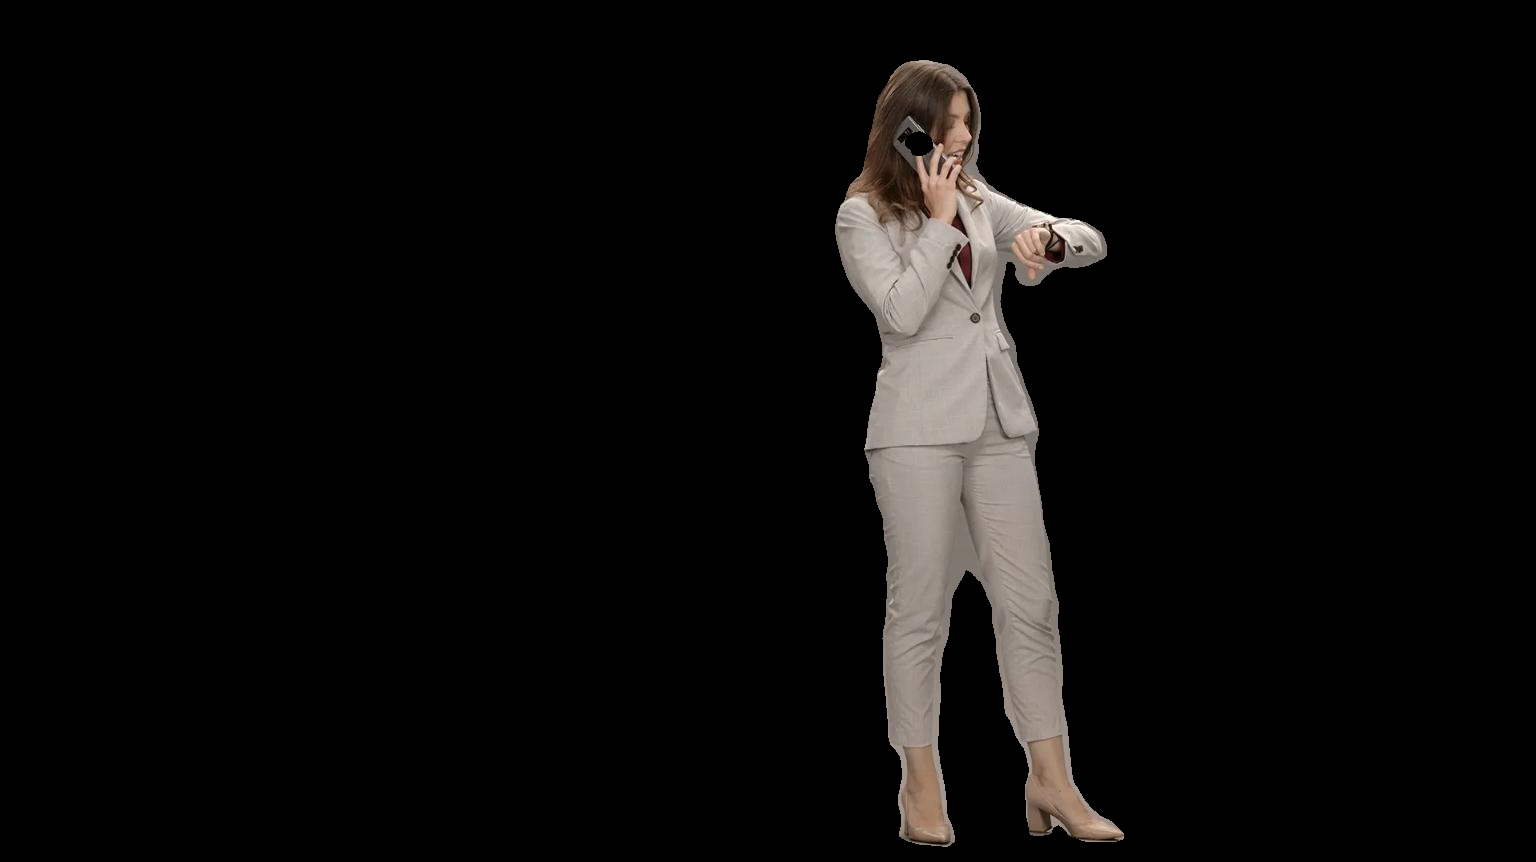

In [14]:
display(Image.fromarray(segmented_image.astype(np.uint8)))

251 124.98826262003737


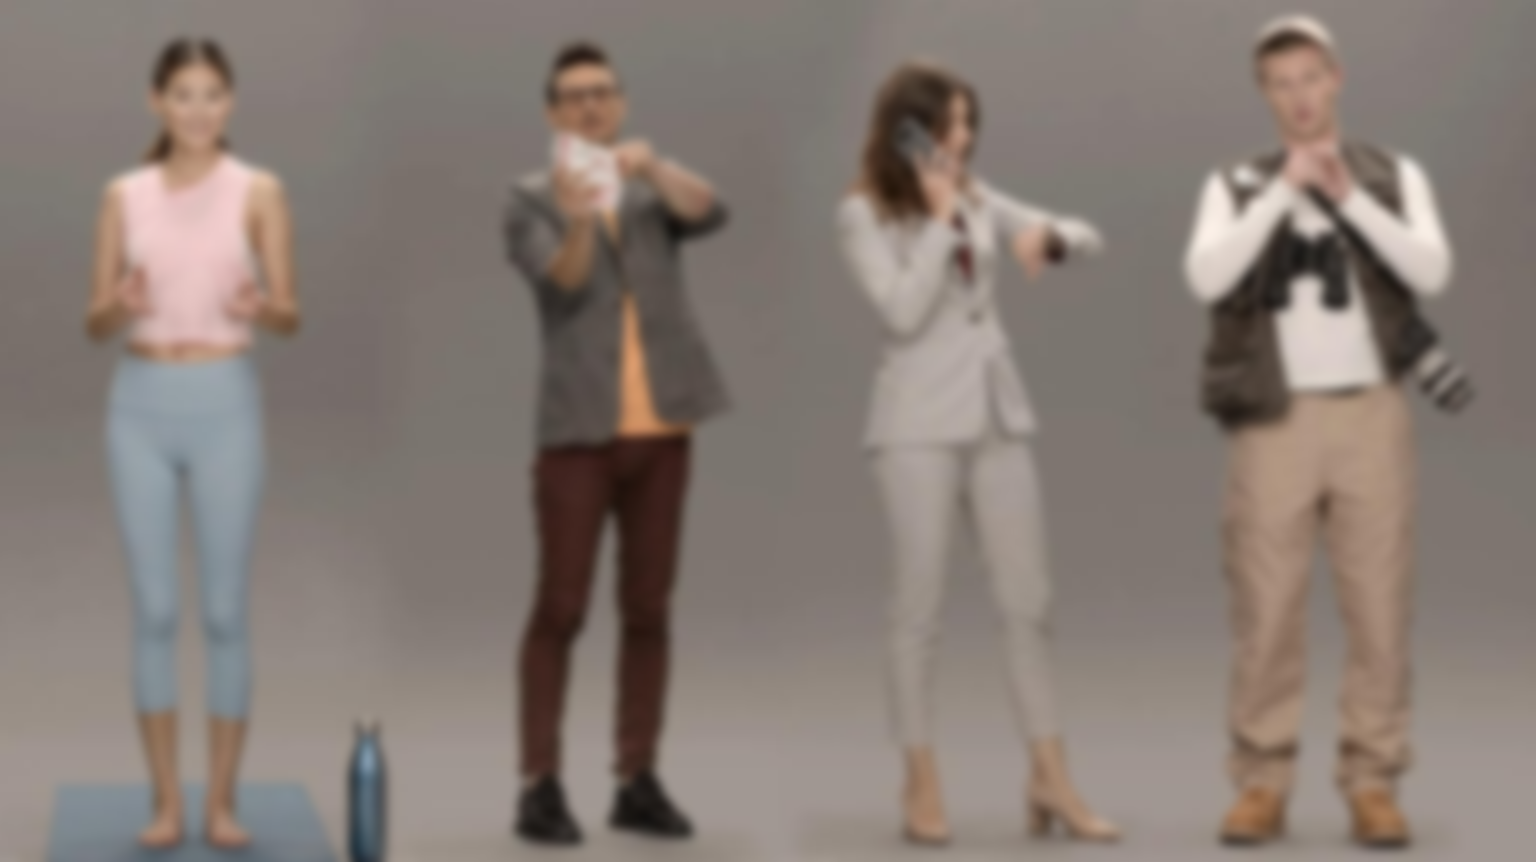

In [15]:
# blur_image = np.asarray(image.filter(ImageFilter.BLUR))

blur_image = np.asarray(image.filter(ImageFilter.GaussianBlur(radius=5)))
print(np.max(blur_image), np.mean(blur_image))
display(Image.fromarray(blur_image))

In [121]:
mask_array_three_channel_invert = 1-mask_array_three_channel

In [122]:
np.min(mask_array_three_channel_invert)

0

In [123]:
np.max(mask_array_three_channel_invert), np.max(mask_array_three_channel)

(1, 1)

In [124]:
blur_image.shape

(1080, 1920, 3)

In [125]:
mask_array_three_channel_invert.shape

(1080, 1920, 3)

In [126]:
blur_image_reverse_mask = blur_image*mask_array_three_channel_invert

In [127]:
np.max(blur_image_reverse_mask), np.min(blur_image_reverse_mask)

(250, 0)

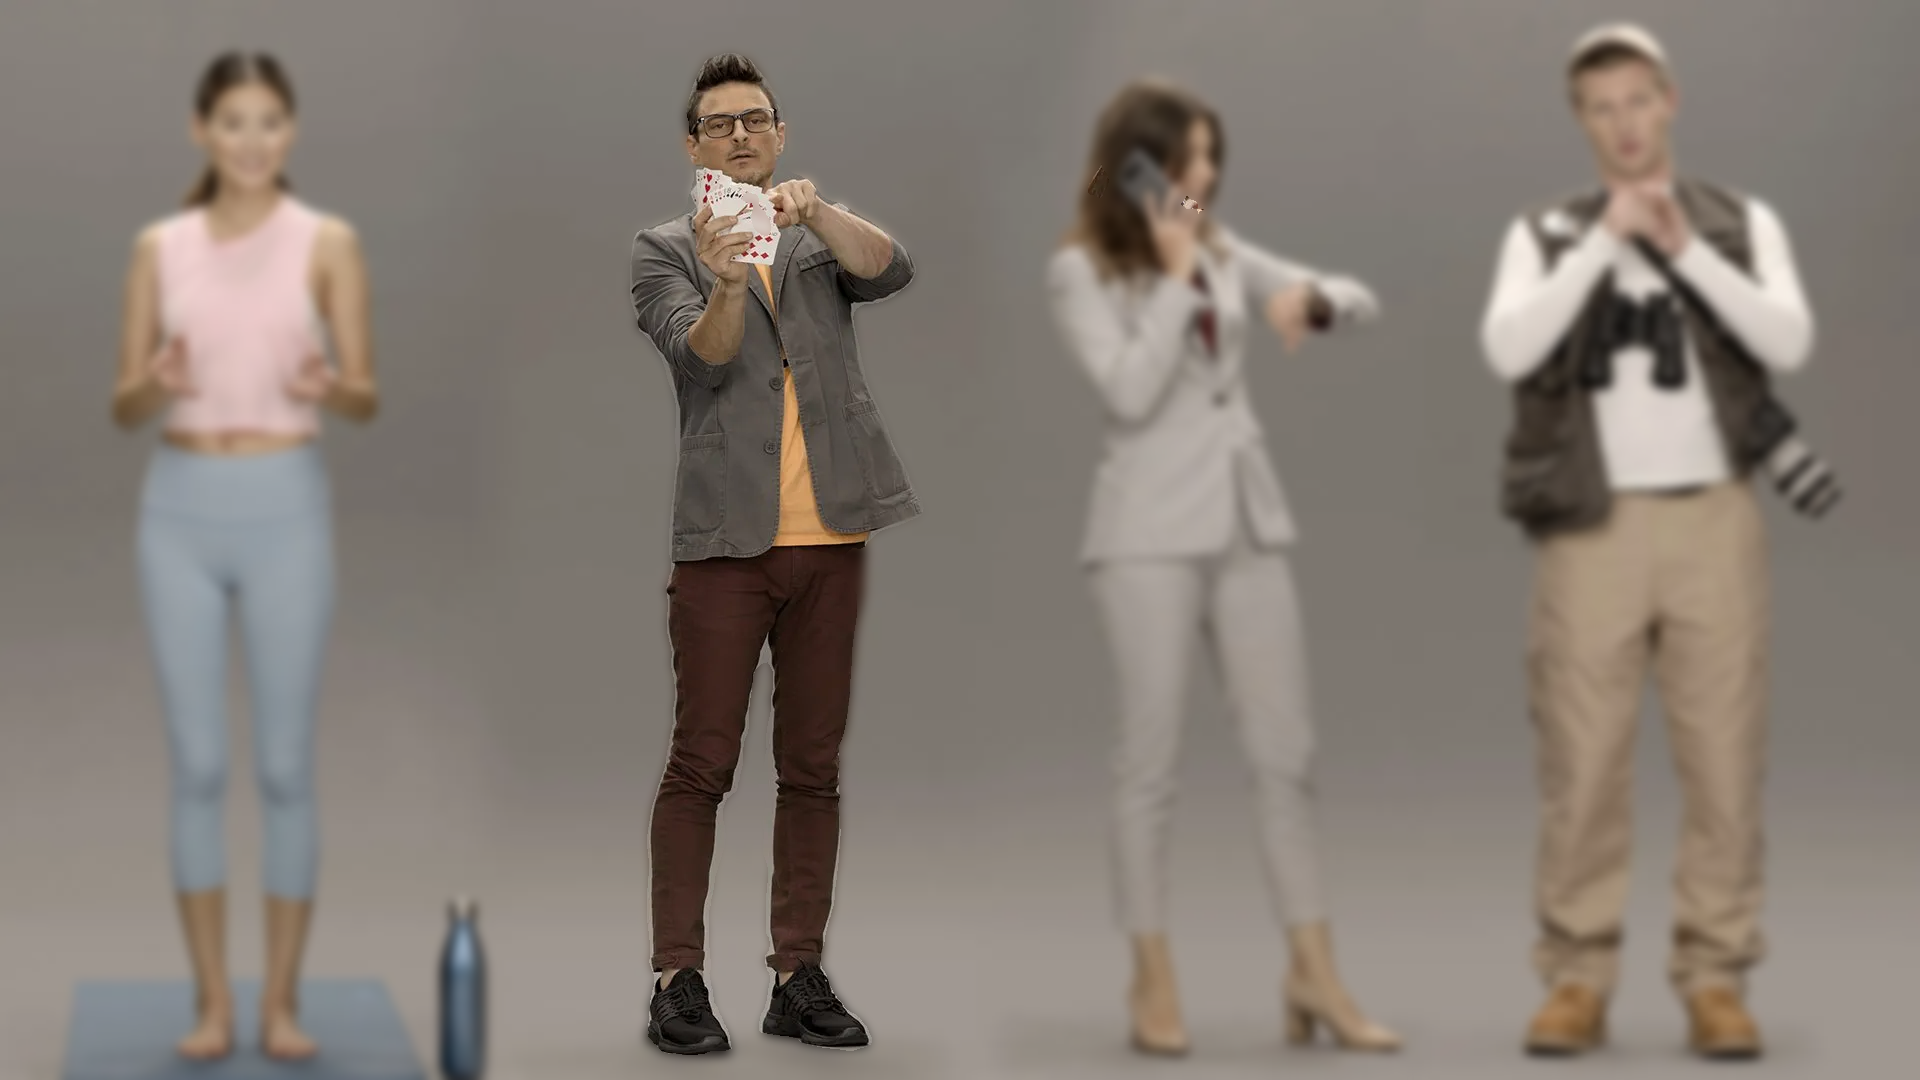

In [128]:
display(Image.fromarray((blur_image_reverse_mask).astype(np.uint8)+segmented_image.astype(np.uint8)))
# display(Image.fromarray(segmented_image.astype(np.uint8)))